In [76]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from config import api_key 

In [77]:
electric_generation_urls = []

electric_generation_urls.append("http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.CLTO_US.A") #Coal_generation_url
electric_generation_urls.append("http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.HVTO_US.A") #Hydropower_url
electric_generation_urls.append("http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.NGTO_US.A") #Natural_gas_url 
electric_generation_urls.append("http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.NUTO_US.A") #nuclear_fuel_url
electric_generation_urls.append("http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.OGTO_US.A") #other_gases_url
electric_generation_urls.append("http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.OTTO_US.A") #othet_nonrenewable_url
electric_generation_urls.append("http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.HPTO_US.A") #pumped_hydropower_url
electric_generation_urls.append("http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.TSEO_US.A") #us_annual_total_url


In [78]:
generation_Capacity = []
generation_years = []
i = 0

for electric_url in electric_generation_urls:
    generation_response = requests.get(electric_url).json()
    generation_Capacity.append([])
    generation_years.append([])
    for response in generation_response["series"][0]["data"]:
        generation_Capacity[i].append(response[1])
        generation_years[i].append(response[0])
    generation_Capacity[i] = generation_Capacity[i][::-1]
    generation_years[i] = generation_years[i][::-1]
    i += 1
    

In [79]:
electric_generation_df = pd.DataFrame({
    'years' : generation_years[0],
    'Coal' : generation_Capacity[0],    
    'Hydro Power' : generation_Capacity[1],
    'Natural Gas' : generation_Capacity[2],
    'Nuclear Fuel' : generation_Capacity[3],
    'Other Gases' : generation_Capacity[4],
    'Other Non Renewables' : generation_Capacity[5],
    'Pumped Hydro Power' : generation_Capacity[6],
    'Total Generation' : generation_Capacity[7]
    
})

electric_generation_df.head()

,years,Coal,Hydro Power,Natural Gas,Nuclear Fuel,Other Gases,Other Non Renewables,Pumped Hydro Power,Total Generation
0,1990,4367.154737,802.372182,1021.274395,1580.442953,28.446110,9.905888,-9.610249,8322.814622
1,1991,4357.870542,791.764901,1045.350731,1678.260512,31.056419,12.983143,-12.442288,8421.366808
2,1992,4429.524696,691.497277,1104.028339,1690.645527,36.257478,10.163625,-11.411426,8425.907661
3,1993,4630.329403,768.476733,1136.785748,1672.030723,35.495337,9.553852,-11.056362,8759.427660
4,1994,4632.037983,712.673240,1260.873101,1754.629677,36.490550,10.046370,-9.254315,8897.321611


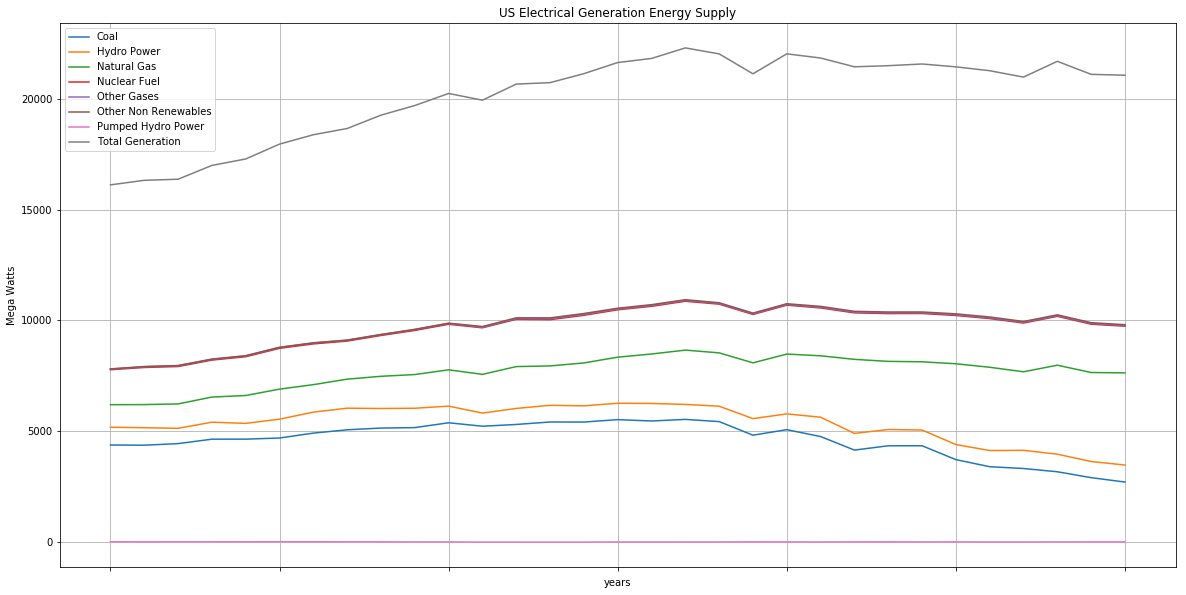

In [80]:
electric_generation_df = electric_generation_df.set_index('years')

ax = electric_generation_df.plot( stacked=True, figsize=(20,10), title = 'US Electrical Generation Energy Supply')

ax.set_ylabel("Mega Watts")
ax.set_xlabel("years")
ax.grid(True)

In [81]:
# US Renewable Energy Supply

renewable_urls = []
renewable_Net_Capacity = []
renewable_years = []
i = 0

renewable_urls.append("http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.WNEPCAPX_US.A")
renewable_urls.append("http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.SOEPCAPX_US.A")
renewable_urls.append("http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.GEEPCAP_US.A")
renewable_urls.append("http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.HVEPCAP_US.A")

for renew_url in renewable_urls:
    renewable_response = requests.get(renew_url).json()
    #renewable_Net_Capacity.append(i)
    renewable_Net_Capacity.append([])
    renewable_years.append([])
    for response in renewable_response["series"][0]["data"]:
        renewable_Net_Capacity[i].append(response[1])
        renewable_years[i].append(response[0])
    renewable_Net_Capacity[i] = renewable_Net_Capacity[i][::-1]
    renewable_years[i] = renewable_years[i][::-1]
    #print(len(renewable_Net_Capacity[i]))
    i += 1


    

In [82]:
#renewable_Net_Capacity

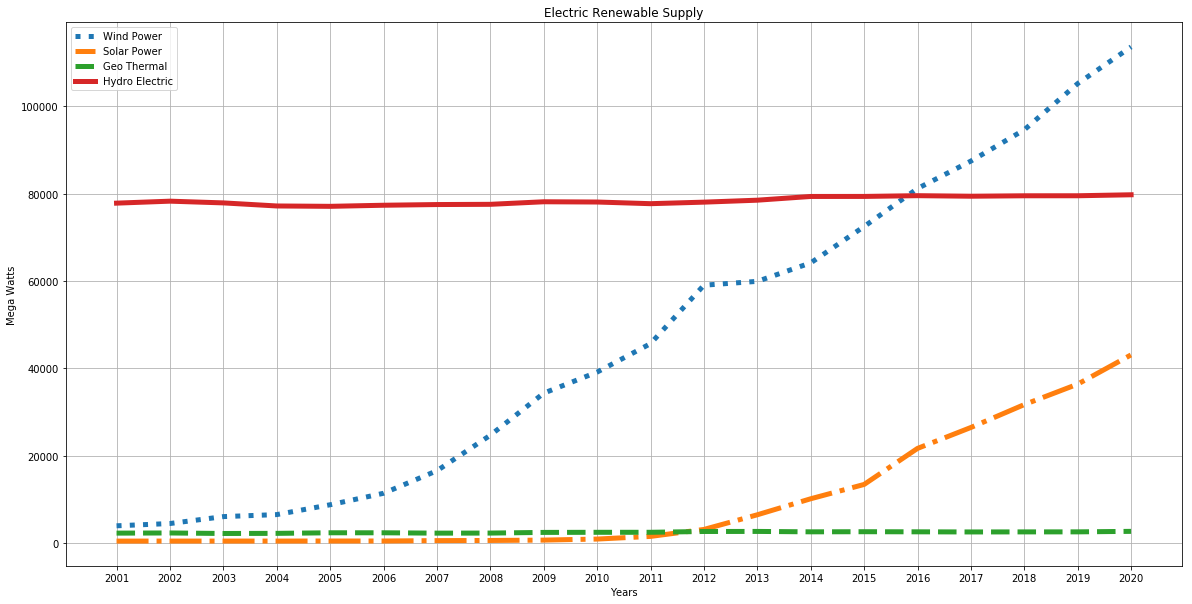

In [83]:
plt.figure(figsize=(20,10))
plt.plot(renewable_years[0], renewable_Net_Capacity[0], label="Wind Power", linewidth=5, linestyle = ':')
plt.plot(renewable_years[0], renewable_Net_Capacity[1], label="Solar Power", linewidth=5, linestyle = '-.')
plt.plot(renewable_years[0], renewable_Net_Capacity[2], label="Geo Thermal", linewidth=5,  linestyle = '--')
plt.plot(renewable_years[0], renewable_Net_Capacity[3], label="Hydro Electric", linewidth=5)
plt.xlabel("Years")
plt.ylabel("Mega Watts")
plt.title("Electric Renewable Supply")

plt.legend()
plt.grid(True)

plt.show()

Text(0.5, 0, 'Years')

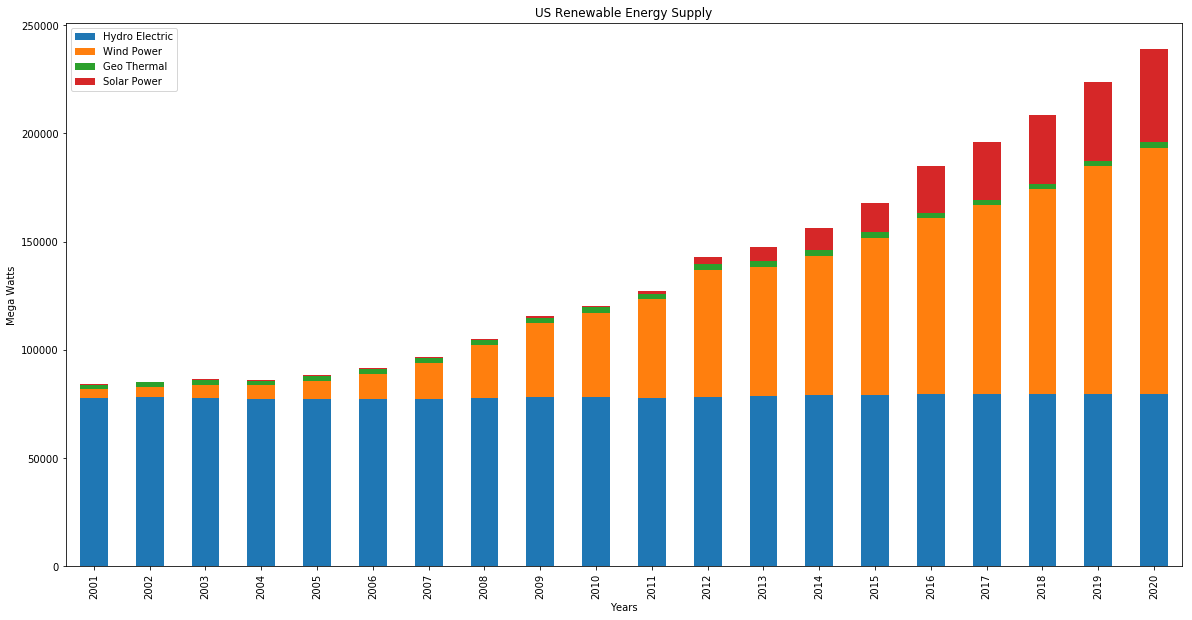

In [84]:

renewable_supply_df = pd.DataFrame({
    'renewable_years' : renewable_years[0],
    'Hydro Electric' : renewable_Net_Capacity[3],    
    'Wind Power' : renewable_Net_Capacity[0],
    'Geo Thermal' : renewable_Net_Capacity[2],
    'Solar Power' : renewable_Net_Capacity[1]
    
})

renewable_supply_df.head()

renewable_supply_df = renewable_supply_df.set_index('renewable_years')

ax = renewable_supply_df.plot(kind='bar', stacked=True, figsize=(20,10), title = 'US Renewable Energy Supply')

ax.set_ylabel("Mega Watts")
ax.set_xlabel("Years")


In [85]:
renewable_supply_df.to_csv("renewable_supply.csv")
electric_generation_df.to_csv("electrical_generation.csv")